#Spencer Peterson - 230157543 - Assignment 1

For this assignment, I will be taking the notebook file that is already given to me, while adapting it to improve it's accuracy. The main areas where the code will be updated will be in the Feature Engineering section. However, there will be one area that will save the cabin numbers for a feature used later in the notebook.

# Exploratory Data Analysis, Feature Engineering, and Prediction with Titanic Data Set

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
sns.set(style="whitegrid", font_scale=1.75)

### Dataset Description

https://www.kaggle.com/competitions/titanic/overview

| **Variable** | **Definition**                                           | **Key**                     |
|--------------|-----------------------------------------------------------|-----------------------------|
| **survival** | Survival                                                 | 0 = No, 1 = Yes            |
| **pclass**   | Ticket class                                             | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| **sex**      | Sex                                                      |                             |
| **Age**      | Age in years                                             |                             |
| **sibsp**    | # of siblings/spouses aboard the Titanic                 |                             |
| **parch**    | # of parents/children aboard the Titanic                 |                             |
| **ticket**   | Ticket number                                            |                             |
| **fare**     | Passenger fare                                           |                             |
| **cabin**    | Cabin number                                             |                             |
| **embarked** | Port of Embarkation                                      | C = Cherbourg, Q = Queenstown, S = Southampton |



In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [ ]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
missing_values = train.isnull().sum().sort_values(ascending = False)
missing_values

,0
cabin,687
age,177
embarked,2
survived,0
pclass,0
name,0
sex,0
sibsp,0
parch,0
ticket,0


In [ ]:
data = train # Replace with your dataset path

# Basic data preprocessing
data = data.drop(['name', 'ticket', 'cabin'], axis=1)  # Drop irrelevant columns

data['age'].fillna(data['age'].median(), inplace=True)  # Fill missing ages with median
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)  # Fill missing embarkation with mode

# Encoding categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])  # Encode Sex (0 for female, 1 for male)
data['embarked'] = encoder.fit_transform(data['embarked'])  # Encode Embarked (0, 1, 2, etc.)

# Define features and target
X = data.drop('survived', axis=1)
y = data['survived']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1: {f1:.3f}")

Accuracy: 0.804
Precision: 0.783
F1: 0.755


<ipython-input-80-e116937da2e6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)  # Fill missing ages with median
<ipython-input-80-e116937da2e6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

## Distribution of the dataset

## What is `seaborn.countplot`?

The `seaborn.countplot` function is part of the **Seaborn** library in Python, designed to visualize the count (frequency) of observations in a categorical dataset. It creates a bar plot where the height of each bar represents the number of occurrences of each category.

---

### Syntax:
```python
seaborn.countplot(data=None, x=None, y=None, hue=None, **kwargs)
```

- **data**: The dataset (e.g., pandas DataFrame) to use.
- **x**/**y**: The categorical variable to plot along the x or y-axis.
- **hue**: Grouping variable that will produce bars in different colors.
- **kwargs**: Other keyword arguments passed to `matplotlib`.

---

### When to Use `countplot`

You should use `countplot` when you want to:

1. **Visualize the frequency distribution of a categorical variable**:
   - E.g., understanding how many passengers survived (yes/no) or the distribution of passenger classes on the Titanic (1st, 2nd, 3rd class).

2. **Compare the frequencies of categories visually**:
   - E.g., comparing survival rates based on gender using `hue`.

3. **Quickly assess imbalances in categories**:
   - E.g., identifying if one category dominates others in a dataset.

---

<ipython-input-81-8c73b9979e88>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set(xlabel="Survival", xticklabels=["Died", "Survived"])


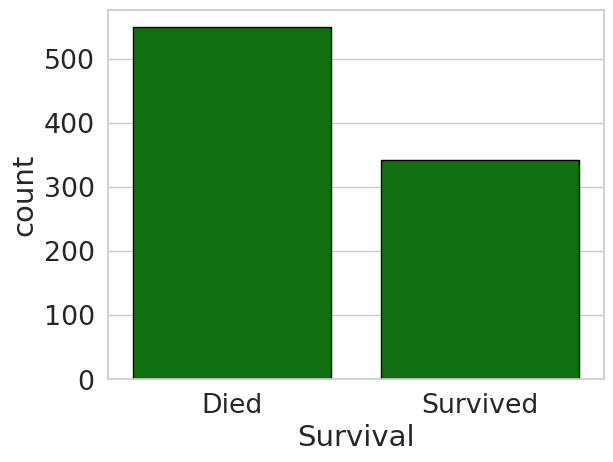

In [ ]:
#sns.countplot(train, x='survived')
plot = sns.countplot(train, x='survived',color='green',edgecolor='black')
plot.set(xlabel="Survival", xticklabels=["Died", "Survived"])
plt.show()


### Sex of the passenger associated with Survival

<ipython-input-82-203ea1dab932>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Survival", xticklabels=["Died", "Survived"])


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

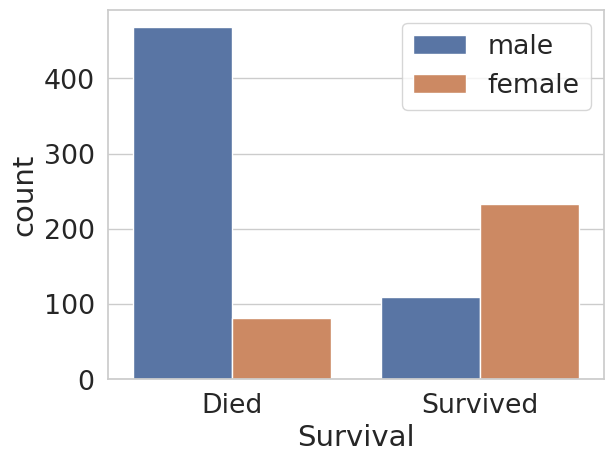

In [ ]:
g = sns.countplot(x='survived', hue='sex', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

### Passenger Class associated with survival

<ipython-input-83-b9e14cb6cc67>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(xlabel="Survival", xticklabels=["Died", "Survived"])


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

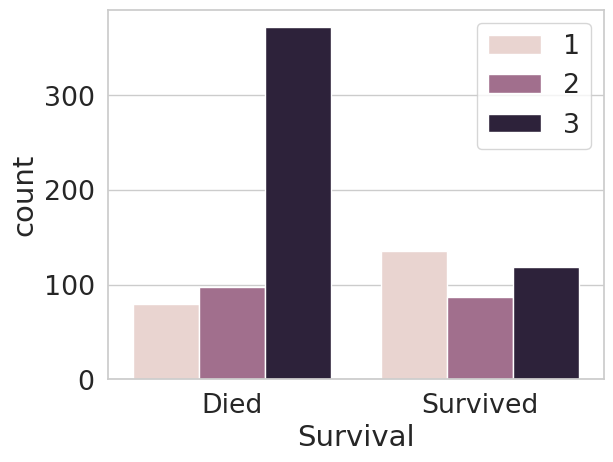

In [ ]:
g = sns.countplot(x='survived', hue='pclass', data=train)
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

### Passenger Class and Sex combined associated with survival

A **pivot table** is a data summarization tool that allows you to group and aggregate data based on specified columns. In the context of pandas, it creates a new DataFrame that reorganizes data based on specified `index`, `columns`, and `values`, and applies an aggregation function to summarize the data.

**Explanation of Example**
```python
gender_class_pivot = train.pivot_table(values=['survived'], index=['sex', 'pclass'])
gender_class_pivot
```

- **`values=['survived']`**: Specifies the column to summarize (here, the `survived` column).
- **`index=['sex', 'pclass']`**: Specifies the grouping columns. The data will be grouped first by `sex` (e.g., male, female) and then by `pclass` (e.g., passenger class 1, 2, 3).
- **Aggregation**: By default, `pivot_table` uses the **mean** as the aggregation function unless otherwise specified. This means it calculates the average survival rate for each group defined by `sex` and `pclass`.

**Output**
The resulting `gender_class_pivot` will look something like this:

| `sex`   | `pclass` | `survived` |
|---------|----------|------------|
| female  | 1        | 0.95       |
| female  | 2        | 0.90       |
| female  | 3        | 0.50       |
| male    | 1        | 0.40       |
| male    | 2        | 0.15       |
| male    | 3        | 0.10       |

**Interpretation**
- Each row corresponds to a combination of `sex` and `pclass`.
- The `survived` column shows the average survival rate for that group. For example, the survival rate for females in 1st class is 95%.

**Why Use a Pivot Table?**
- To quickly summarize and analyze data by groups.
- Useful for exploring relationships and patterns in data.
- It’s an efficient way to calculate statistics (like mean, sum, or count) for grouped data.

You can customize the aggregation function using the `aggfunc` parameter (e.g., `aggfunc='sum'` for counts or totals).

In [ ]:
gender_class_pivot = train.pivot_table(values=['survived'], index=['sex', 'pclass'])
gender_class_pivot

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

A **catplot** in Seaborn is a versatile visualization function that creates plots for categorical data. It is particularly useful when you want to visualize the relationship between a categorical variable and one or more numerical variables.

The syntax for sns.catplot() allows you to choose different types of plots such as bar plots, box plots, strip plots, etc., by specifying the kind parameter.
Syntax

sns.catplot(data=your_data, x='categorical_column', y='numerical_column', kind='plot_type', ...)

Common kind Options

    kind='strip': Scatter plot of categorical data.
    kind='swarm': Non-overlapping scatter plot (like strip but avoids overlapping points).
    kind='box': Box plot to show distributions and outliers.
    kind='violin': Violin plot to show distributions with KDE.
    kind='bar': Bar plot showing mean and confidence intervals.
    kind='count': Count plot (similar to sns.countplot()).
    kind='point': Point plot to show trends.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


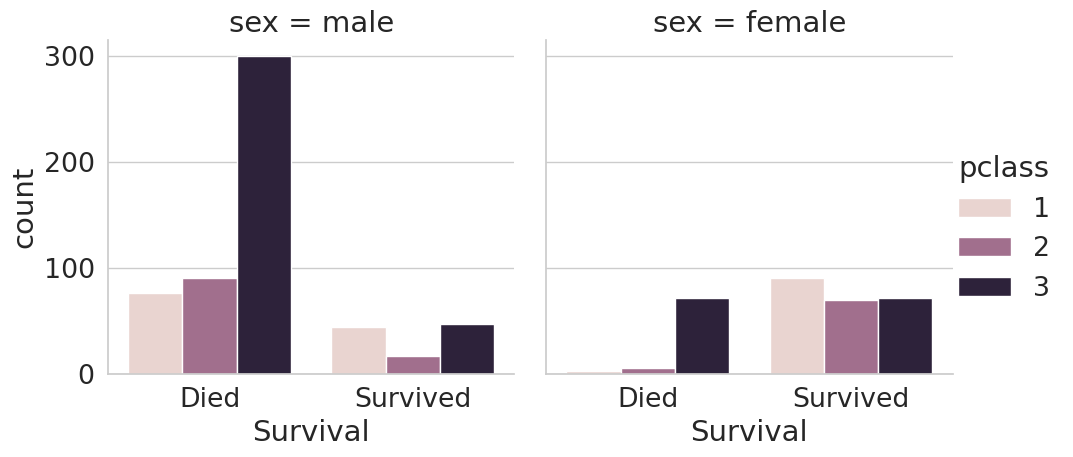

In [ ]:
g = sns.catplot(x="survived", hue="pclass", col='sex', data=train, kind='count')
g.set(xticklabels=['Died', 'Survived'], xlabel="Survival")

3rd Class male passengers forms the largest group who died. In all the three classes femely passengers survived the most.

### Fares Paid associated with Survival

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


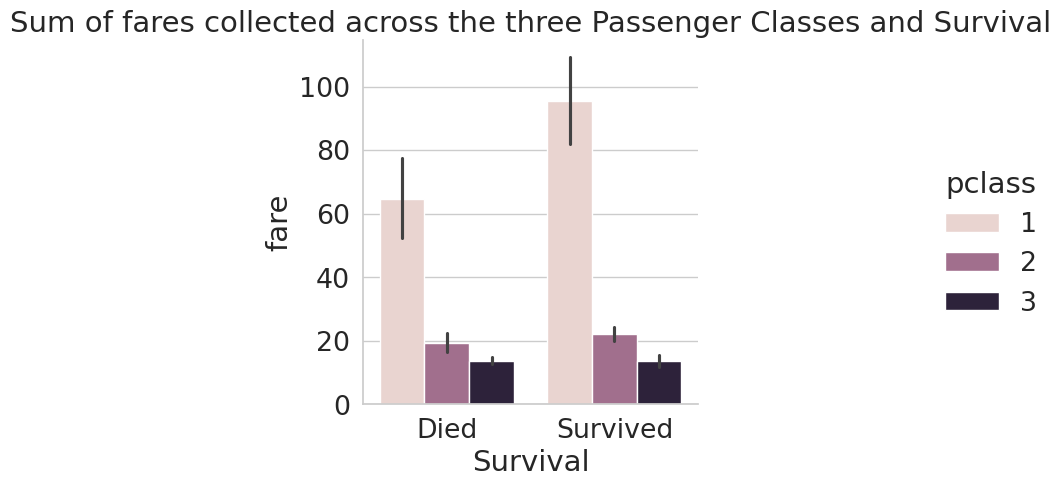

In [ ]:
g = sns.catplot(x="survived", y="fare", hue="pclass", data=train.sort_values(by='pclass'), kind="bar");
g.set(xticklabels=['Died', 'Survived'], xlabel="Survival", title="Sum of fares collected across the three Passenger Classes and Survival")

Though the 3rd Class passengers forms the largest group but it's the 1st Class passengers who survived the most. This shows Rescue services were provided to wealthy passengers.


### Survival with age

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(**kwargs)


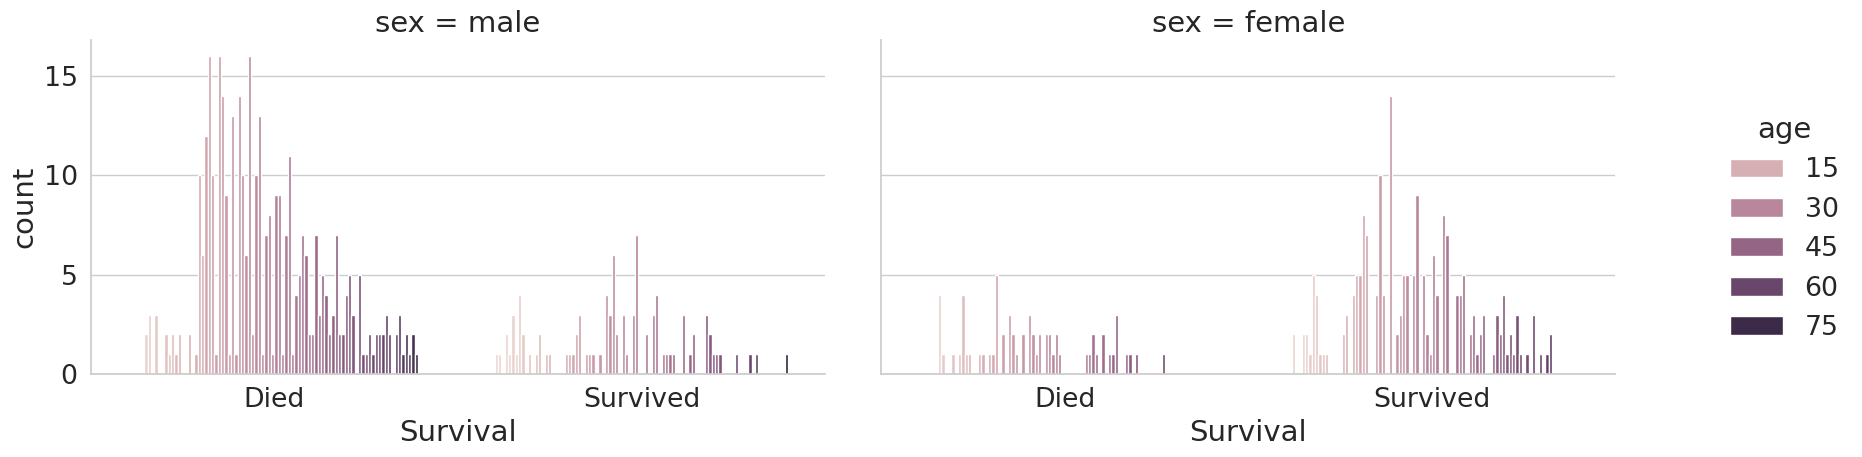

In [ ]:
g = sns.catplot(col="sex", x="survived", hue="age", data=train.sort_values(by='age'), kind='count')
g.set(xlabel="Survival", xticklabels=['Died', 'Survived'])
g.fig.set_figwidth(20)

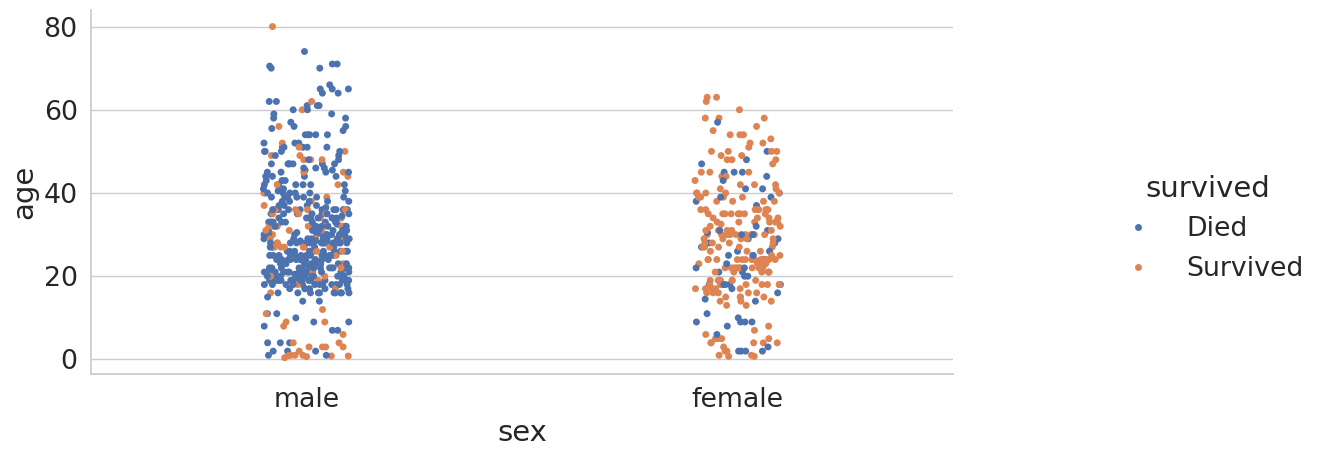

In [ ]:
g = sns.catplot(y="age", x="sex", hue="survived", data=train)

new_labels = ['Died', 'Survived']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
g.fig.set_figwidth(16)

### Survival with Travel Companion

In [ ]:
sibling_spouse_pivot_table = train.pivot_table(values = ['survived'],index = 'sibsp')
sibling_spouse_pivot_table

,survived
sibsp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Text(0, 0.5, 'Sibling/spouse count')

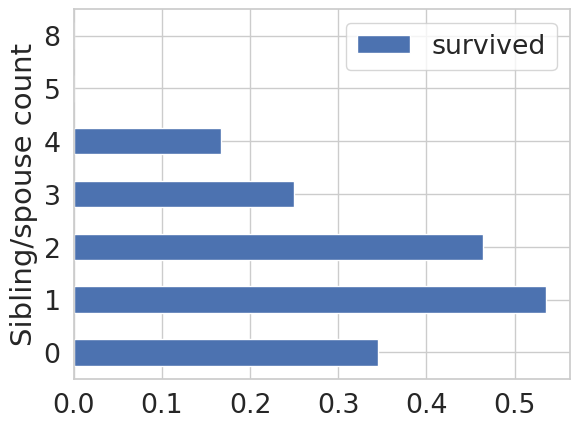

In [ ]:
sibling_spouse_pivot_table.plot(kind='barh')
plt.ylabel('Sibling/spouse count')

### Embarked with survival

In [ ]:
embarked_pivot_table=train.pivot_table(values=['survived'], index='embarked')
embarked_pivot_table


,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


It looks like, Passengers who boarded the Titanic from Southampton were the least fornunate. We need to analyze more. Let's do it with Passenger Class.

In [ ]:
embarked_passenger_class_pivot_table = train.pivot_table(values=['survived'], index=['embarked', 'pclass'])
embarked_passenger_class_pivot_table

survived
embarked pclass          
C        1       0.694118
         2       0.529412
         3       0.378788
Q        1       0.500000
         2       0.666667
         3       0.375000
S        1       0.582677
         2       0.463415
         3       0.189802

3rd Class passengers who boarded from Souththampon, were the least fortunate.

Text(0, 0.5, 'Embarkeded/ Passenger Class')

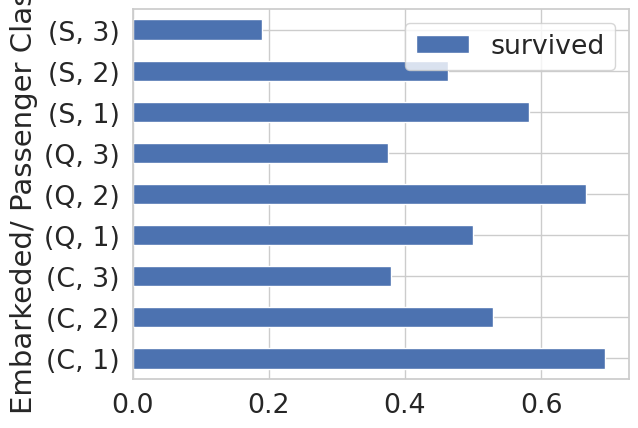

In [ ]:
embarked_passenger_class_pivot_table.plot(kind = 'barh')
plt.ylabel('Embarkeded/ Passenger Class')

### Cabin with Survival

In [ ]:
print(train['cabin'].unique())
train['cabin_number'] = train['cabin']

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [ ]:

train['cabin'] = train['cabin'].apply(lambda x: 'not in a cabin' if pd.isnull(x) else 'in a cabin')
print(train['cabin_number'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


###Note regarding cabin numbers
With this, we have saved the cabin number. This will be used later in this notebook.

In [ ]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_number
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,not in a cabin,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,in a cabin,C,C85
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,not in a cabin,S,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,in a cabin,S,C123
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,not in a cabin,S,NaN


In [ ]:
print(train['cabin'].unique())

['not in a cabin' 'in a cabin']


In [ ]:
cabin_pivot_table=train.pivot_table(values=['survived'], index='cabin')
cabin_pivot_table

,survived
cabin,
in a cabin,0.666667
not in a cabin,0.299854


It looks like being in a cabin, somehow helped with Survival

# Feature Engineering

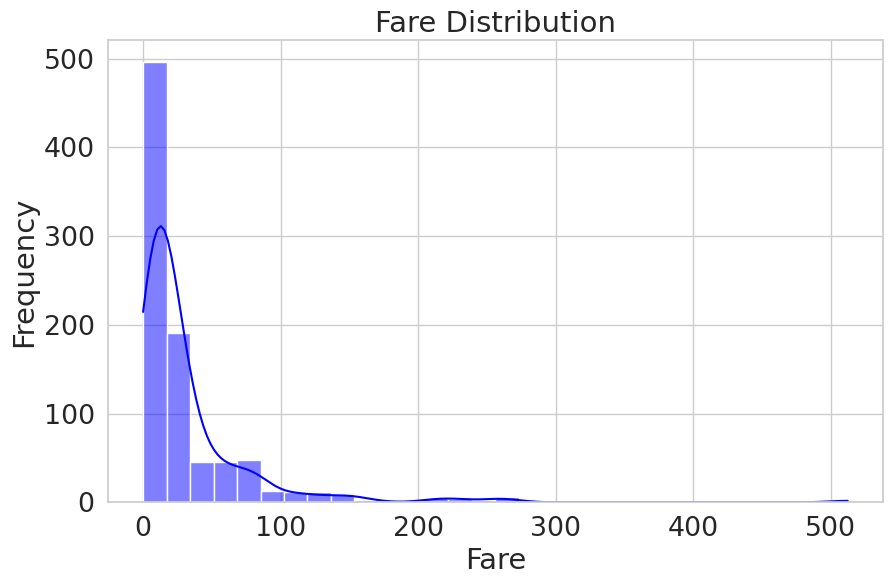

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='fare', kde=True, bins=30, color='blue')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd

# Example Titanic dataset (replace 'train' with your actual DataFrame)
# train = pd.read_csv('titanic.csv')  # Uncomment and load your dataset

# Define fare categories
def categorize_fare(fare):
    if fare < 10:
        return 'Low'
    elif 10 <= fare < 50:
        return 'Medium'
    elif 50 <= fare < 100:
        return 'High'
    else:
        return 'Very High'

# Create a new column 'Fare Category'
train['fare_category'] = train['fare'].apply(categorize_fare)

In [ ]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_number,fare_category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,not in a cabin,S,NaN,Low
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,in a cabin,C,C85,High
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,not in a cabin,S,NaN,Low
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,in a cabin,S,C123,High
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,not in a cabin,S,NaN,Low


<ipython-input-102-7288300bf179>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fare_category', y='survived', data=train, ci=None, palette='viridis')
<ipython-input-102-7288300bf179>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fare_category', y='survived', data=train, ci=None, palette='viridis')


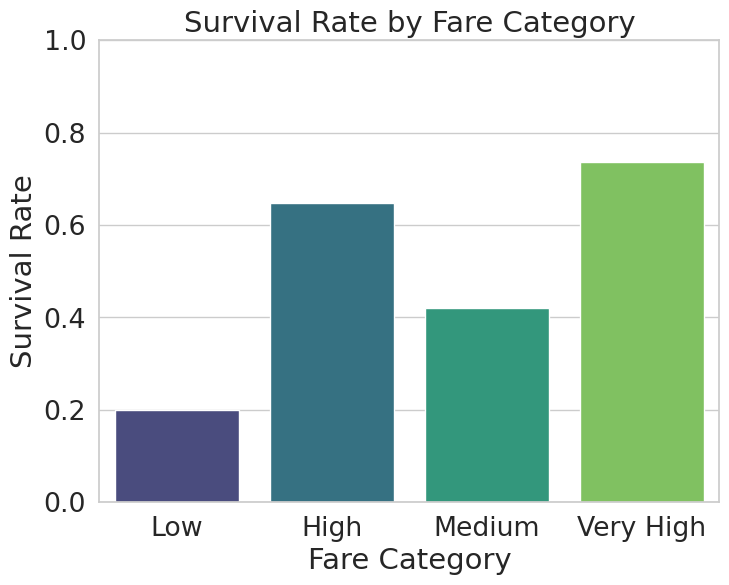

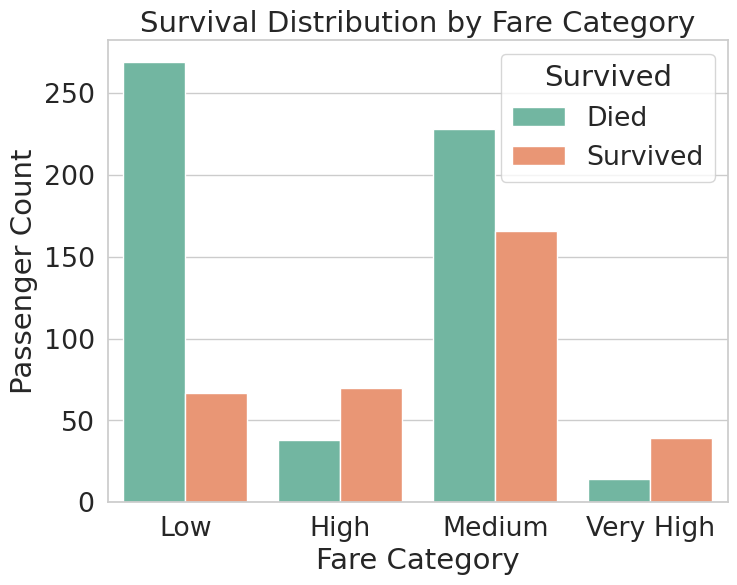

In [ ]:

# Create a bar plot for survival rate by fare category
plt.figure(figsize=(8, 6))
sns.barplot(x='fare_category', y='survived', data=train, ci=None, palette='viridis')
plt.title('Survival Rate by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Survival rate is between 0 and 1
plt.show()

# Create a count plot to show the distribution of passengers and survival by fare category
plt.figure(figsize=(8, 6))
sns.countplot(x='fare_category', hue='survived', data=train, palette='Set2')
plt.title('Survival Distribution by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', loc='upper right', labels=['Died', 'Survived'])
plt.show()


In [ ]:


# Example Titanic dataset (replace 'train' with your actual DataFrame)
# train = pd.read_csv('titanic.csv')  # Uncomment if loading from a file

# Define the age mapping
mapping = {
    1: "Infant",      # Infants: <1
    13: "Child",      # Children: <13
    18: "Teen",       # Teens: 13-17
    66: "Adult",      # Adults: 18-65
    123: "Elderly"    # Elderly: 66+
}

# Convert the mapping into sorted bins and labels
bins = [0] + list(mapping.keys())  # [0, 1, 13, 18, 66, 123]
labels = list(mapping.values())    # ["Infant", "Child", "Teen", "Adult", "Elderly"]

# Create a new column 'Age Category' using pd.cut()
train['age_category'] = pd.cut(train['age'], bins=bins, labels=labels, right=False)

# Display the first few rows of the updated DataFrame
print(train[['age', 'age_category']].head())

# Optional: Check the distribution of age categories
print(train['age_category'].value_counts())


    age age_category
0  22.0        Adult
1  38.0        Adult
2  26.0        Adult
3  35.0        Adult
4  35.0        Adult
age_category
Adult      593
Child       62
Teen        44
Elderly      8
Infant       7
Name: count, dtype: int64


<ipython-input-104-9cfbf2035ce6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_category', y='survived', data=train, ci=None, palette='viridis')
<ipython-input-104-9cfbf2035ce6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_category', y='survived', data=train, ci=None, palette='viridis')


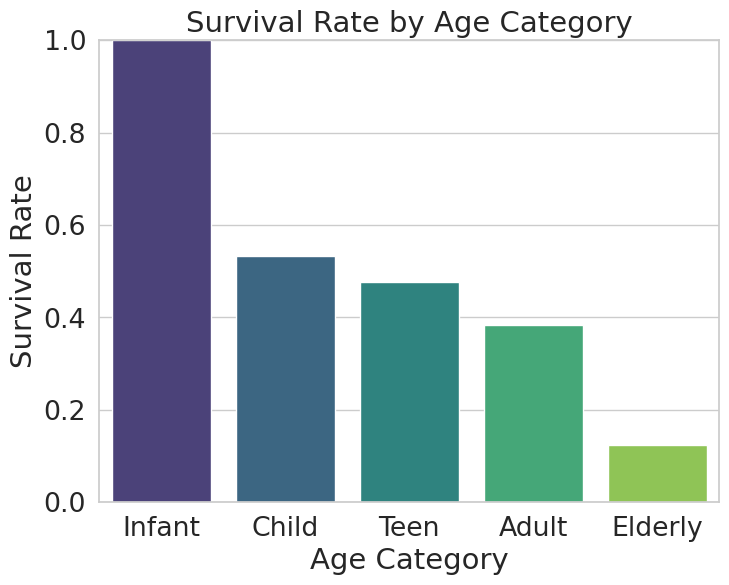

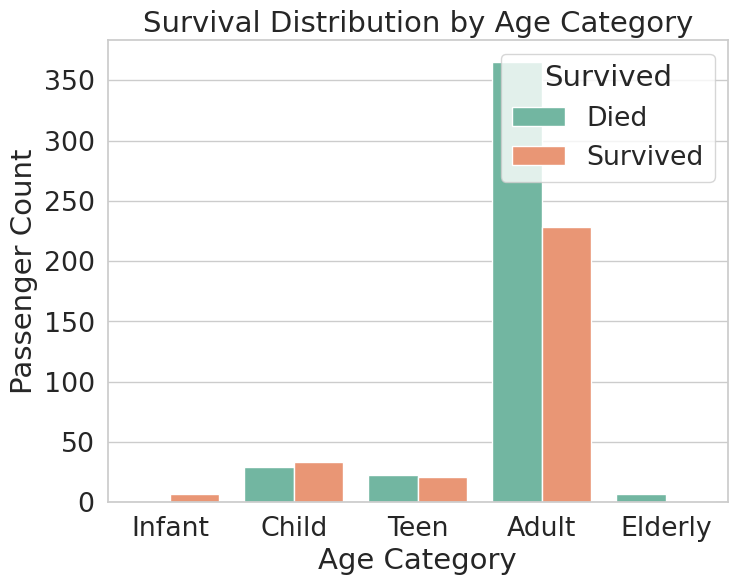

In [ ]:


# Create a bar plot for survival rate by fare category
plt.figure(figsize=(8, 6))
sns.barplot(x='age_category', y='survived', data=train, ci=None, palette='viridis')
plt.title('Survival Rate by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Survival rate is between 0 and 1
plt.show()

# Create a count plot to show the distribution of passengers and survival by fare category
plt.figure(figsize=(8, 6))
sns.countplot(x='age_category', hue='survived', data=train, palette='Set2')
plt.title('Survival Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', loc='upper right', labels=['Died', 'Survived'])
plt.show()


In [ ]:
train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_number,fare_category,age_category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,not in a cabin,S,NaN,Low,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,in a cabin,C,C85,High,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,not in a cabin,S,NaN,Low,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,in a cabin,S,C123,High,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,not in a cabin,S,NaN,Low,Adult


## Model Evalution with Feature Engineering

### **What is a Label Encoder?**

A **Label Encoder** is a tool in the `sklearn.preprocessing` module that is used to convert categorical data (labels) into numeric values. This is useful in machine learning because many models work only with numeric data.

---

### **How Label Encoding Works**

The `LabelEncoder` assigns a unique integer to each unique category in the data. For example:

- A column with values `['male', 'female']` would be encoded as:
  - `male` → `1`
  - `female` → `0`
  
- A column with values `['S', 'C', 'Q']` (e.g., embarked port) would be encoded as:
  - `S` → `2`
  - `C` → `0`
  - `Q` → `1`

---


#### **Step-by-Step Process**
1. **`encoder = LabelEncoder()`**:
   - Creates an instance of `LabelEncoder`.
   
2. **`encoder.fit_transform(column)`**:
   - `fit` learns the unique categories in the column (e.g., `['female', 'male']`).
   - `transform` converts these categories into numeric values.

3. **Assign Encoded Values**:
   - The encoded values are assigned back to the respective columns in the `data` DataFrame.

---

### **Result of Label Encoding**

After applying the `LabelEncoder`, the dataset `data` will have numeric columns for the specified categorical columns:

| **sex** | **embarked** | **fare_category** | **age_category** |
|---------|--------------|-------------------|------------------|
| 0       | 2            | 0                 | 1                |
| 1       | 0            | 1                 | 0                |
| 0       | 1            | 2                 | 2                |

---

### **Advantages of Label Encoding**
- Simple to implement.
- Efficient for converting categorical labels to numbers.

---

### **Disadvantages**
- **Ordinal Misinterpretation**:
  - Encoded values are treated as ordinal (e.g., `0 < 1 < 2`), which may not make sense for non-ordinal data (e.g., embarked port).
  - To avoid this issue, use **one-hot encoding** for non-ordinal categorical data.

---

### **When to Use Label Encoding?**
- Use when:
  - The categorical variable is ordinal (e.g., `Low`, `Medium`, `High`).
  - A machine learning algorithm can handle numeric labels appropriately (e.g., tree-based models like decision trees and random forests).

- Avoid when:
  - The categorical variable is nominal (e.g., `embarked`, `sex`) and the encoding might introduce unintended ordinal relationships. Instead, use **one-hot encoding** for nominal data.

In [ ]:
train.head()

NameError: name 'train' is not defined

### **What is a Standard Scaler?**

The **`StandardScaler`** is a preprocessing tool in `sklearn.preprocessing` used to standardize features in a dataset. It ensures that each feature has:

- **Mean = 0**
- **Standard Deviation = 1**

This is often a critical step in machine learning, as many algorithms (e.g., SVM, logistic regression, k-means clustering) perform better when the input data is scaled.

---

### **How It Works**

1. **`fit()`**: Calculates the mean and standard deviation for each feature in the training dataset.
2. **`transform()`**: Applies the transformation to standardize the data using the formula:

   \[
   z = \frac{x - \mu}{\sigma}
   \]
   
   Where:
   - \( x \): Original feature value
   - \( \mu \): Mean of the feature
   - \( \sigma \): Standard deviation of the feature
   - \( z \): Standardized value

3. **`fit_transform()`**: Combines `fit()` and `transform()` in one step (used for the training data).

---

### **Explanation of the Code**

```python
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit again)
X_test = scaler.transform(X_test)
```

#### **Steps in the Code:**
1. **`scaler = StandardScaler()`**:
   - Creates an instance of the `StandardScaler`.

2. **`scaler.fit_transform(X_train)`**:
   - **`fit`**: Calculates the mean and standard deviation for each feature in `X_train`.
   - **`transform`**: Standardizes the training data using the calculated mean and standard deviation.

3. **`scaler.transform(X_test)`**:
   - Standardizes the test data using the **same mean and standard deviation** calculated from the training data during `fit`.
   - This ensures that the scaling is consistent and does not leak information from the test set into the training process.

---

### **Why Standardize Data?**

1. **Improves Algorithm Performance**:
   - Many algorithms (e.g., gradient descent, SVMs, k-means) are sensitive to feature scales.
   - Standardization ensures all features contribute equally, preventing dominance by features with larger scales.

2. **Speeds Up Convergence**:
   - Scaling helps optimization algorithms converge faster during training.

3. **Prevents Numerical Instability**:
   - Features with vastly different scales can lead to numerical instability in calculations.

---

### **When to Use?**

- Use when your dataset has features with different ranges or units (e.g., age vs income).
- Commonly applied in algorithms that are distance-based or sensitive to scale, such as:
  - Support Vector Machines (SVM)
  - Principal Component Analysis (PCA)
  - Logistic Regression
  - K-Nearest Neighbors (KNN)
  - Neural Networks

---

### **Effect of Scaling Example**

#### Before Scaling:
| Feature 1 (Age) | Feature 2 (Income) |
|------------------|--------------------|
| 25               | 50000             |
| 30               | 70000             |
| 35               | 90000             |

#### After Scaling:
| Feature 1 (Age) | Feature 2 (Income) |
|------------------|--------------------|
| -1.22            | -1.22             |
| 0.00             | 0.00              |
| 1.22             | 1.22              |

Now both features contribute equally to the model.

---

### **Important Notes**
1. **Fit Only on Training Data**:
   - Always use `fit_transform()` on the training set and `transform()` on the test set to avoid data leakage.
   
2. **Handle Outliers Carefully**:
   - If your data contains outliers, consider using a more robust scaler (e.g., `RobustScaler`) since the mean and standard deviation are sensitive to outliers.

3. **StandardScaler vs MinMaxScaler**:
   - **`StandardScaler`**: Standardizes to mean 0, variance 1.
   - **`MinMaxScaler`**: Scales data to a fixed range, usually `[0, 1]`.

Below here is the modifications done to the model as was shown in lesson 3. While this is definitely an improvement over what was seen before, I will be further improving on it with my own feature engineering, as well as by updating the model.

In [ ]:
# Basic data preprocessing
data = train
data = data.drop(['name', 'ticket', 'cabin', 'cabin_number'], axis=1)  # Drop irrelevant columns
data['age'].fillna(data['age'].median(), inplace=True)  # Fill missing ages with median
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)  # Fill missing embarkation with mode

# Encoding categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(train['sex'])  # Encode Sex (0 for female, 1 for male)
data['embarked'] = encoder.fit_transform(train['embarked'])  # Encode Embarked (0, 1, 2, etc.)
data['fare_category'] = encoder.fit_transform(train['fare_category'])  # Encode Sex (0 for female, 1 for male)
data['age_category'] = encoder.fit_transform(train['age_category'])  # Encode Embarked (0, 1, 2, etc.)

# Define features and target
X = data.drop('survived', axis=1)
y=data['survived']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1: {f1:.3f}")

#My feature engineering
Below here, you will see the features that I will be adding in order to improve the model's performance. There are 3 main features that I have engineered:


*   If someone had a cabin
*   If someone was in the upper, middle, or lower deck area

*   If someone embarked from Southampton and had a 3rd class ticket





##**Feature Engineering for People in Cabin**

As shown previously. People who had a cabin were more likely to survive than people who did not have a cabin. With this in mind, I will generate a new feature called "had_cabin". The function below will check if someone does have a cabin, if they do, then it will return Yes, if not, No.

In [ ]:
import pandas as pd

#With this, we will check if someone had a cabin. From this, we will set if someone had a cabin, or did not have a cabin.

def cabin_check(cabin):
  if  cabin == 'in a cabin':
    return 'Yes'
  elif cabin == 'not in a cabin':
    return 'No'

#Create feature "Has Cabin"
train['has_cabin'] = train['cabin'].apply(cabin_check)
test['has_cabin'] = test['cabin'].apply(cabin_check)



In [ ]:
has_cabin_pivot_table = train.pivot_table(values=['survived'], index=['has_cabin'])
has_cabin_pivot_table

,survived
has_cabin,
No,0.299854
Yes,0.666667


With this, we now have a way of showing that someone in a cabin has a higher chance of survival than those not in a cabin.

##Cabin Level and Survival
As shown before cabins can affect the odds of survival. However, the level of the cabin may also affect those odds. For example, an A-level cabin is for first class holders while F-level cabins are for third class holders. We will now show that cabin level can affect survival odds. To demonstrate this, a pivot table will be used, but first, we will extract the cabin level from each passenger who had a cabin. To simplify things, A and B cabins will be Upper, C and D cabins will be Middle, and E and F cabins will be Lower.

In [ ]:
import pandas as pd
import math

def cabin_level(cabin_number):
  #If the entry is NaN, it will return nothing
  if pd.isna(cabin_number):
    return
  #Convert cabin number into a string
  cabin = str(cabin_number)
  #Compare what the cabin level is based on Alphabetical Value. Set the level to upper, middle, or lower depending on the letter.
  if'A' in cabin_number or 'B' in cabin_number:
    return 'Upper'
  elif 'C' in cabin_number or 'D' in cabin_number:
    return 'Middle'
  elif 'E' in cabin_number or 'F' in cabin_number:
    return 'Lower'

#Create new feature based on cabin_level function
train['cabin_level'] = train['cabin_number'].apply(cabin_level)

cabin_level_pivot_table= train.pivot_table(values=['survived'], index=['cabin_level'])
cabin_level_pivot_table


,survived
cabin_level,
Lower,0.711111
Middle,0.652174
Upper,0.677419


As we can see here, People in the lower cabins had the highest chance of survival, people in the upper cabins had the second best chance, and people in the middle cabins had the lowest chance of survival. With this info in mind, it will be helpful when it comes to impacting survival.

##Southampton and Class
Here, we will make a feature that is for when a passenger is both in 3rd class and from Southampton. This will be useful, as it was shown before that people from Southampton had the lowest chance of survival, especially people from 3rd class.

In [ ]:
def southampton_class(embark, pclass):
  if isinstance(embark, str) and 'S' in embark and pclass == 3:
    return 'Yes'
  else:
    return 'No'

train['southampton_class'] = train.apply(lambda row: southampton_class(row['embarked'], row['pclass']), axis=1)

southampton_class_pivot_table = train.pivot_table(values = ['survived'], index = ['southampton_class'])
southampton_class_pivot_table

,survived
southampton_class,
No,0.511152
Yes,0.189802


As we can see here, someone who is from southampton and was third class had very low chances of survival compared to anyone else. This will make for a useful feature for our model.

#My approach to this assignment

For this assignment, I plan on basing it off of the logistic regression model that was used in the lesson, but I plan on improving upon it, while also adding some new features. In the feature engineering section, I had mentioned the use a new feature to check if someone is in a cabin, as this does affect the odds of survival. To add onto it, I added in a cabin level feature. This is because people in the upper and lower level cabins had a higher chance of survival over someone in the middle level cabins.

In regards to encoding, I decided to modify some of the encoding to use one-hot encoding. While label encoding is good for some features, such as fare and age categories, others, such as sex and whether or not someone has a cabin, would benefit better through the use of one-hot encoding. This is because there isn't an ordinality with them unlike the others, plus it helped to improve the model.

For the model itself, I continued to use Logistic Regression. However, unlike the lesson version, I updated it to improve the odds. I set the C parameter to 0.1, as a lower C parameter will reduce the chances of overfitting. I also set the max number of iterations, to ensure that it doesn't do too many iterations, potentially overfitting. Finally I set the penalty parameter to l2. This sets the model to use a penalty system similar to ridge regression.

In [ ]:
# Basic data preprocessing
data = train
data = data.drop(['name', 'ticket', 'cabin', 'fare', 'cabin_number'], axis=1)  # Drop irrelevant columns
data['age'].fillna(data['age'].median(), inplace=True)  # Fill missing ages with median
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)  # Fill missing embarkation with mode
# Encoding categorical variables
encoder = LabelEncoder()
#One hot encode some features, while using label encoding for other features
data = pd.get_dummies(data, columns=['sex', 'has_cabin', 'cabin_level', 'southampton_class'], drop_first= True) #one hot encode values
data['embarked'] = encoder.fit_transform(train['embarked']) #Encode embarked
data['fare_category'] = encoder.fit_transform(train['fare_category'])  # Encode fare category
data['age_category'] = encoder.fit_transform(train['age_category'])  # Encode age category

# Define features and target
X = data.drop('survived', axis=1)
y=data['survived']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(C = .1,max_iter=100, penalty='l2', solver='sag')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"F1: {f1:.3f}")

Accuracy: 0.838
Precision: 0.817
F1: 0.800


<ipython-input-112-d113b9c67524>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)  # Fill missing ages with median
<ipython-input-112-d113b9c67524>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

##Summary Table Comparing Models
Now that we have done our feature engineering and improvements to our model, here is a table summarizing the improvements to the model from The beginning of this notebook file when there was no feature engineering, to what was done after some feature engineering was already done to the model by Professor Saha for lesson 3, to finally what it is after we have done our feature engineering and changes to our model. The 3 main areas we are scoring for our models on is accuracy, precision, and F1.

| Test | Beginning of Notebook | Lesson 3 Feature Engineering| Personal Feature Engineering and Model Updates|
|------------|--------|-------|---------|
| Accuracy  |  80.4% |81.6% |83.8% |
| Precision | 78.3% |78.3% |81.7% |
| F1 | 75.5% |75.5% |80.0%

##Setting up Test Dataset

The following pieces of code will be preparing the test dataset. Features will be created based on what was done with the training set, and pre-processing will be done to prepare the test dataset for our model.

In [ ]:
test['cabin_number'] = test['cabin']
test['fare_category'] = test['fare'].apply(categorize_fare)
test['age_category'] = pd.cut(test['age'], bins=bins, labels=labels, right=False)
test['has_cabin'] = test['cabin'].apply(cabin_check)
test['cabin_level'] = test['cabin_number'].apply(cabin_level)
test['southampton_class'] = test.apply(lambda row: southampton_class(row['embarked'], row['pclass']), axis=1)

test.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,has_cabin,fare_category,age_category,cabin_number,cabin_level,southampton_class
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,not in a cabin,Q,No,Low,Adult,not in a cabin,None,No
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,not in a cabin,S,No,Low,Adult,not in a cabin,None,Yes
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,not in a cabin,Q,No,Low,Adult,not in a cabin,None,No
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,not in a cabin,S,No,Low,Adult,not in a cabin,None,Yes
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,not in a cabin,S,No,Medium,Adult,not in a cabin,None,Yes


Below will be the pre-processing for our features for the test dataset, and then training our model on the training data, and then finally using our model on the test dataset to predict if someone has survived or not on the Titanic

In [ ]:
#test out on test dataset now
#Create columns for test based on training feature engineering
test['cabin'] = test['cabin'].apply(lambda x: 'not in a cabin' if pd.isnull(x) else 'in a cabin')
test['fare_category'] = test['fare'].apply(categorize_fare)
test['age_category'] = pd.cut(test['age'], bins=bins, labels=labels, right=False)
test['has_cabin'] = test['cabin'].apply(cabin_check)
test['cabin_level'] = test['cabin_number'].apply(cabin_level)

# Basic data preprocessing
data_test = test
data_test = data_test.drop(['name', 'ticket', 'fare', 'cabin_number'], axis=1)  # Drop irrelevant columns
data_test['age'].fillna(data_test['age'].median(), inplace=True)  # Fill missing ages with median
data_test['embarked'].fillna(data_test['embarked'].mode()[0], inplace=True)  # Fill missing embarkation with mode
data_test['has_cabin'].fillna(data_test['has_cabin'].mode()[0], inplace=True)
# Encoding categorical variables
encoder = LabelEncoder()
#One hot encode some features, while using label encoding for other features
data_test = pd.get_dummies(data_test, columns=['sex', 'has_cabin', 'cabin_level', 'southampton_class'], drop_first= True) #one hot encode values
data_test['embarked'] = encoder.fit_transform(test['embarked']) #Encode embarked
data_test['fare_category'] = encoder.fit_transform(test['fare_category'])  # Encode fare category
data_test['age_category'] = encoder.fit_transform(test['age_category'])  # Encode age category
#Drop NaN values
data_test.dropna()

X_train = data.drop('survived', axis=1)
y_train = data['survived']
X_test = data_test
#Make sure that test data's columns will match up with training set's columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Set up our model and train it based on
model = LogisticRegression(C = .1,max_iter=100, penalty='l2', solver='sag')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)








<ipython-input-115-37cd91aeb68c>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['age'].fillna(data_test['age'].median(), inplace=True)  # Fill missing ages with median
<ipython-input-115-37cd91aeb68c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

Here, we will now output our predictions to a new .csv called "submission.csv". this will be what we submit to Kaggle

In [ ]:
#The name of our csv to submit to Kaggle
submission = "submission.csv"
#A Function that will create a new column for passenger ID. This will be used for the Kaggle submission, based on the submission requirements.
def passenger_count(row):
  return row.name + 892
#Apply function to data_test to create new feature for PassengerId
data_test['PassengerId'] = data_test.apply(passenger_count, axis=1)
#Set survival pased on model prediction
data_test['Survived'] = y_pred
#Create csv that only has PassengerId and Survived columns
data_test[['PassengerId','Survived']].to_csv(submission, index=False)
#Print head of PassengerId and Survived rows
data_test[['PassengerId', 'Survived']].head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


##Kaggle Submission

As we can see here, while the accuracy score on the training set was 83.8%, the score on the test set with Kaggle was 77.5%. With this in mind, it looks like there was overfitting with my model.
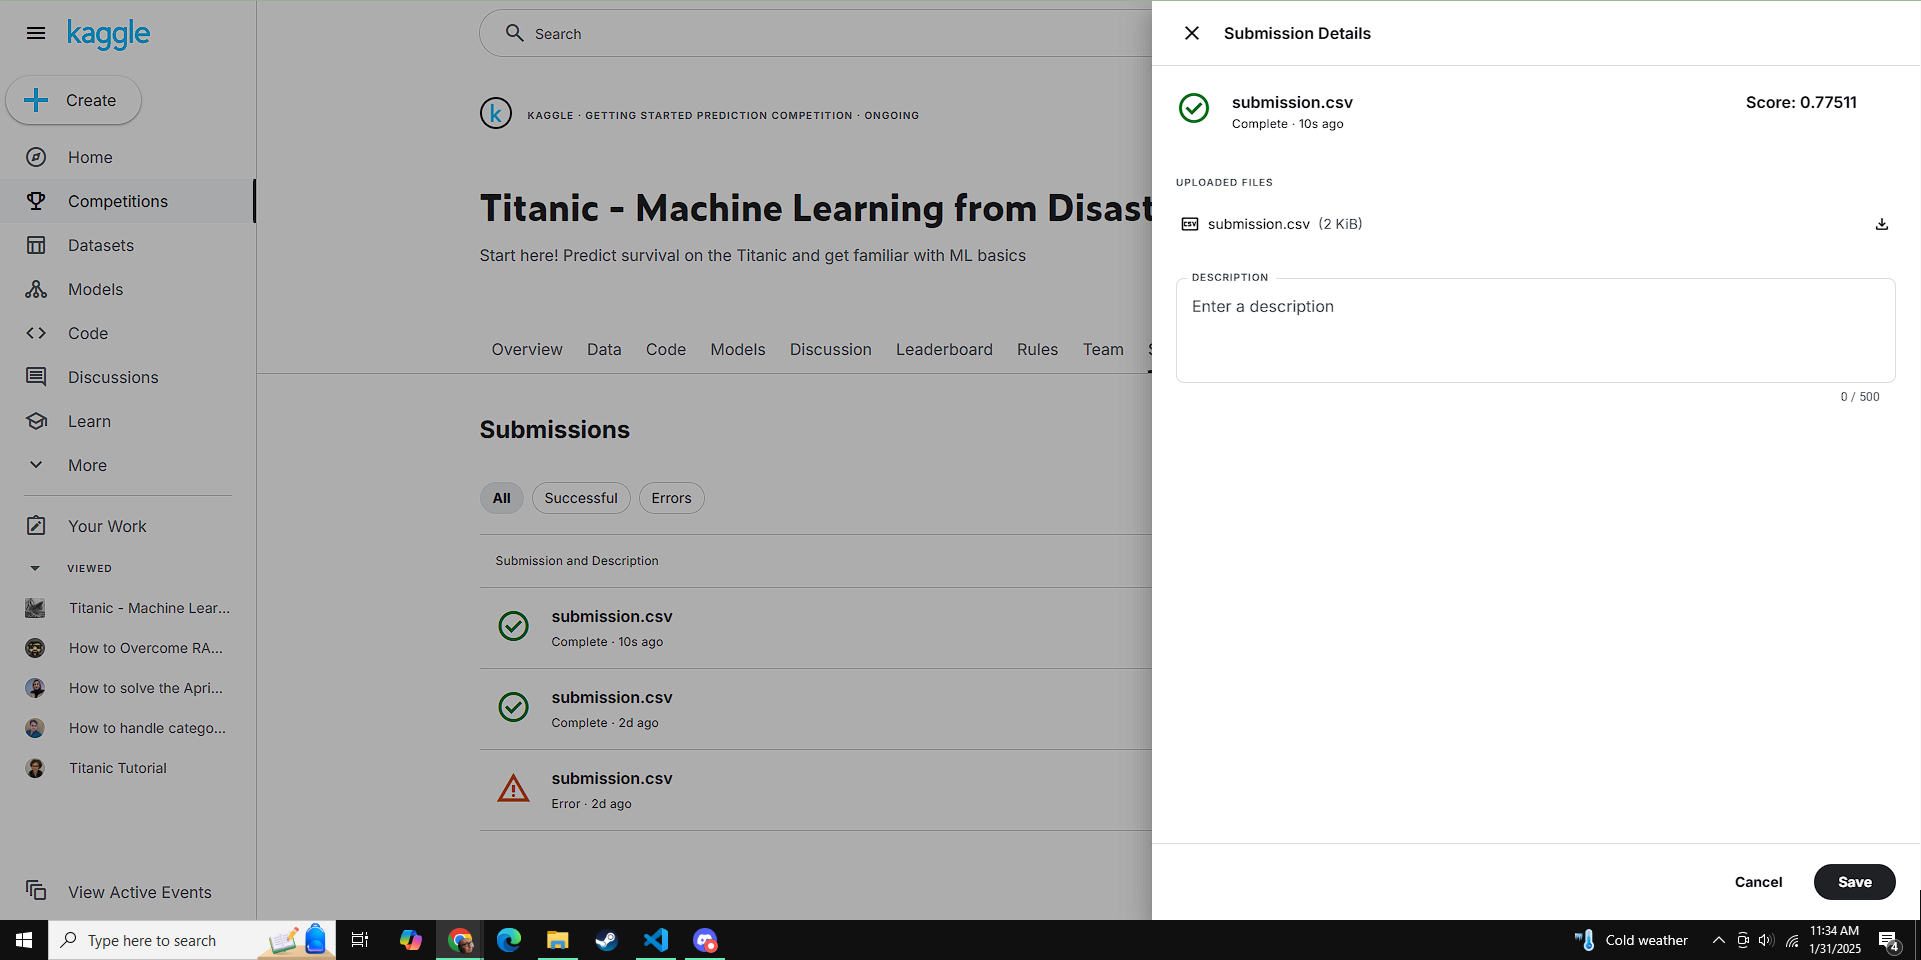